<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/ArvoreDeDecisao-IA/blob/main/Questao1/Analise_de_risco_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Decision tree -  CART 

import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [4]:
# Read in the weather data csv
base_risco_credito=pd.read_csv('RiscoDeCredito.csv', encoding='utf-8')
base_risco_credito

,Historia de Credito,Divida,Garantia,Renda,Risco
0,Ruim,Alta,Nenhuma,0_15,Alto
1,Desconhecida,Alta,Nenhuma,15_35,Alto
2,Desconhecida,Baixa,Nenhuma,15_35,Moderado
3,Desconhecida,Baixa,Nenhuma,acima_35,Alto
4,Desconhecida,Baixa,Nenhuma,acima_35,Baixo
5,Desconhecida,Baixa,Adequada,acima_35,Baixo
6,Ruim,Baixa,Nenhuma,0_15,Alto
7,Ruim,Baixa,Adequada,acima_35,Moderado
8,Boa,Baixa,Nenhuma,acima_35,Baixo
9,Boa,Alta,Adequada,acima_35,Baixo


In [6]:
#Pre-processamento dos dados
x_risco_credito = base_risco_credito.iloc[:, 0:4].values
x_risco_credito #mostra todos os atributos com excessao da clase

array([['Ruim', 'Alta', 'Nenhuma', '0_15'],
       ['Desconhecida', 'Alta', 'Nenhuma', '15_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '15_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Desconhecida', 'Baixa', 'Adequada', 'acima_35'],
       ['Ruim', 'Baixa', 'Nenhuma', '0_15'],
       ['Ruim', 'Baixa', 'Adequada', 'acima_35'],
       ['Boa', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Boa', 'Alta', 'Adequada', 'acima_35'],
       ['Boa', 'Alta', 'Nenhuma', '0_15'],
       ['Boa', 'Alta', 'Nenhuma', '15_35'],
       ['Boa', 'Alta', 'Nenhuma', 'acima_35'],
       ['Ruim', 'Alta', 'Nenhuma', '15_35']], dtype=object)

In [7]:
#Pre-processamento dos dados
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito #mostrar classe

array(['Alto', 'Alto', 'Moderado', 'Alto', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

In [8]:
#Pre-processamento dos dados
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [9]:
#Pre-processamento dos dados
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_encoder_garantia.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[:, 3])

In [10]:
#Pre-processamento dos dados
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [11]:
# salvando os dados pre-processados
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f) 

In [12]:
import pickle
with open('risco_credito.pkl', 'rb') as f:  # abrindo o arquivo já pre-processado
  x_risco_credito, y_risco_credito = pickle.load(f)



In [13]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [14]:
y_risco_credito

array(['Alto', 'Alto', 'Moderado', 'Alto', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

In [15]:
def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter, 
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf, 
                                        random_state=0, 
                                  )
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

*************** Tree Summary ***************
Classes:  ['Alto' 'Baixo' 'Moderado']
Tree Depth:  3
No. of leaves:  5
No. of features:  4
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.0
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00       1.0
       Baixo       0.00      0.00      0.00       2.0
    Moderado       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9
              precision    recall  f1-score   support

        Alto       0.83      1.00      0.91         5
       Baixo       1.00      0.67      0.80         3
    Moderado       1.00      1.00      1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.875, 'renda <= 1.5\ngini = 0.62\nsamples = 10\nvalue = [5, 3, 2]\nclass = Alto'),
 Text(0.25, 0.625, 'divida <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]\nclass = Alto'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Alto'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Moderado'),
 Text(0.75, 0.625, 'historia de credito <= 1.5\ngini = 0.56\nsamples = 5\nvalue = [1, 3, 1]\nclass = Baixo'),
 Text(0.625, 0.375, 'garantias <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]\nclass = Baixo'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Baixo'),
 Text(0.75, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]\nclass = Alto'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Moderado')]

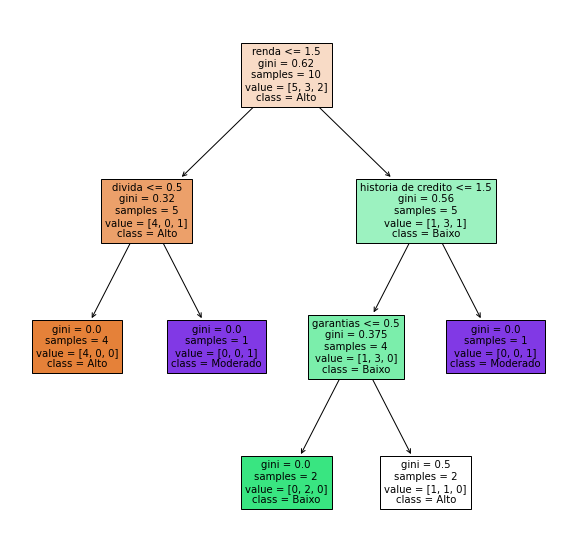

In [17]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(x_risco_credito, y_risco_credito  , 'gini', 'best', 
                                                       mdepth=3, 
                                                       clweight=None,
                                                       minleaf=1)
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['historia de credito', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows = 1, ncols =1, figsize=(10,10))
tree.plot_tree(clf, feature_names=previsores, class_names = clf.classes_, filled= True)

In [18]:
#espaço para realizar testes:
#Entradas em numeros para as instancias:
#Pra Historia de credito
# 0 ->  Boa
# 1 ->  Desconhecida
# 2 ->  Ruim


#Pra Divida
# 0 ->  Alta
# 1 ->  Baixa

#Pra Garantia
# 0 ->  Adequada
# 1 ->  Nenhuma


#Pra Renda
# 0 ->  entre 0 e 15
# 1 ->  entre 15 e 35
# 2 -> acima de 35



#exemplo para [boa, baixa, nenhuma, entre 0 e 15]
previsores= clf.predict([[0,1,1, 0]])
previsores

array(['Moderado'], dtype=object)